In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import defaultdict

### Load T domain data

In [3]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/fitness_prediction/Tdomain'

file = os.path.join(data_path, 'dataset_2_tdomain.csv')
df = pd.read_csv(file)

train_mask = (df['split_id'] == 2)

In [4]:
df_train_t_domain = df[train_mask].copy()

In [5]:
df_train_t_domain.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.073117,2,46,-2.615701
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059
5,IN1,APGIEAYARPPYVAPQGERERLLASLWRELLRVPEVGANDSFFALG...,0.000000,2,41,-13.815511


In [6]:
df_train_t_domain.shape

(55, 6)

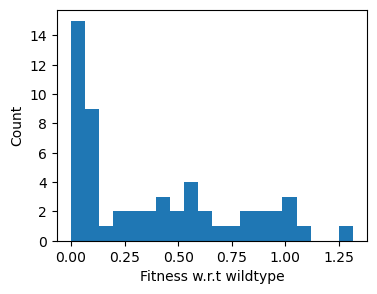

In [10]:
plt.figure(figsize=(4,3))
_ = plt.hist(df_train_t_domain['fitness_raw'], bins=20)
_ = plt.xlabel('Fitness w.r.t wildtype')
_ = plt.ylabel('Count')

In [8]:
ref_values = df_train_t_domain['fitness_raw'].to_numpy()

In [9]:
df_train_t_domain['fitness_raw'].max()

1.315125968

In [10]:
def match_distribution(reference, pool, indices, sample_size, num_bins=20):

    ref_hist, bin_edges = np.histogram(reference, bins=num_bins)
    
    pool_bins = np.digitize(pool, bins=bin_edges[:-1], right=False)
    
    pool_df = pd.DataFrame({'value': pool, 'bin': pool_bins})
    
    target_counts = np.round((ref_hist / ref_hist.sum()) * sample_size).astype(int)
    
    while target_counts.sum() != sample_size:
        diff = sample_size - target_counts.sum()
        idx = np.argmax(ref_hist)
        target_counts[idx] += np.sign(diff)

    sampled_values = []
    for bin_num, count in enumerate(target_counts, start=1):
        bin_members = pool_df[pool_df['bin'] == bin_num]
        if len(bin_members) >= count:
            sampled = bin_members.sample(n=count, replace=False).index.tolist()
        else:
            sampled = bin_members.index.tolist()
            
        sampled_values.extend(sampled)

    if len(sampled_values) < sample_size:
        remaining = np.setdiff1d(np.arange(len(indices)), np.array(sampled_values))
        add = np.random.choice(remaining, size=sample_size-len(sampled_values), replace=False)
        sampled_values.extend(list(add))

    assert len(sampled_values) == sample_size
    
    return indices[sampled_values]

### GB1 Dataset

In [11]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/fitness_prediction/GB1'

file = os.path.join(data_path, 'dataset_gb1.csv')
df = pd.read_csv(file)

train_mask = (df['split_id'] == 2)

In [12]:
df.head()

,seq,fitness_raw,split_id,n_mut,fitness_log
0,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,1.00,2,0,0.000000
1,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGIDGEWTYD...,1.45,2,1,0.371564
2,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGLDGEWTYD...,1.69,2,1,0.524729
3,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGMDGEWTYD...,1.17,2,1,0.157004
4,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVAGEWTYD...,2.40,2,1,0.875469


In [13]:
max_filter = df['fitness_raw'] < 1.5

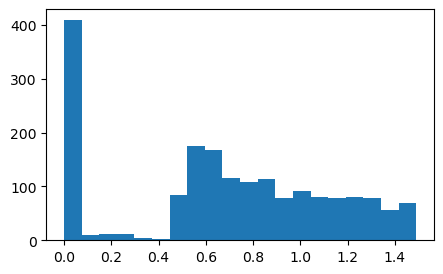

In [14]:
plt.figure(figsize=(5,3))
_ = plt.hist(df[train_mask & max_filter]['fitness_raw'], bins=20)

In [15]:
sample_dict = {}
for sample_size in [50, 100, 200]:
    sample_dict[sample_size] = {}
    for k in range(5):
        sampled = match_distribution(ref_values, df[train_mask & max_filter]['fitness_raw'].to_numpy(), np.array(df[train_mask & max_filter].index), sample_size, num_bins=20)
        sample_dict[sample_size][k] = sampled

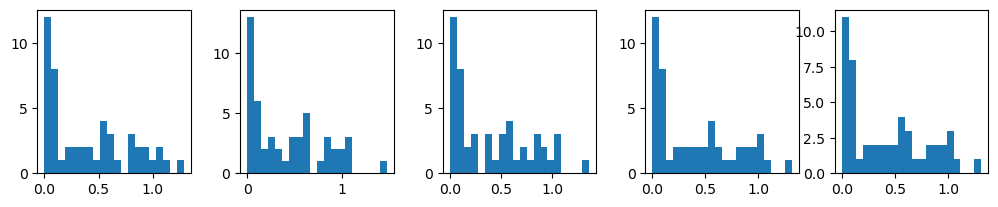

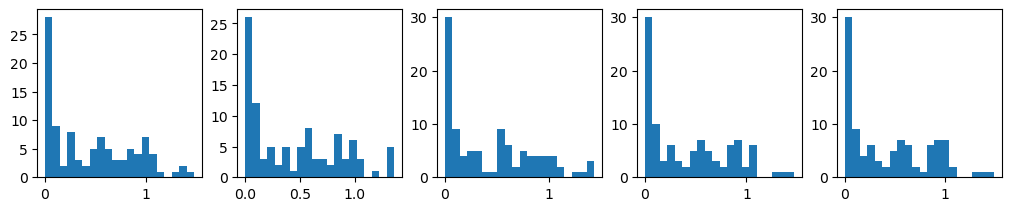

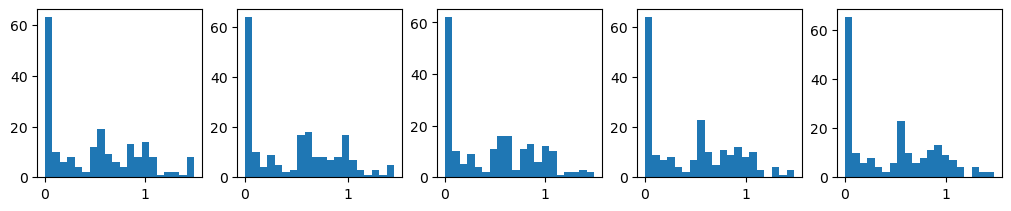

In [16]:
for sample_size in sample_dict:
    fig, ax = plt.subplots(1, 5, figsize=(10,2), layout="constrained")
    for k in sample_dict[sample_size]:
        ax[k].hist(df.loc[sample_dict[sample_size][k], 'fitness_raw'], bins=20)

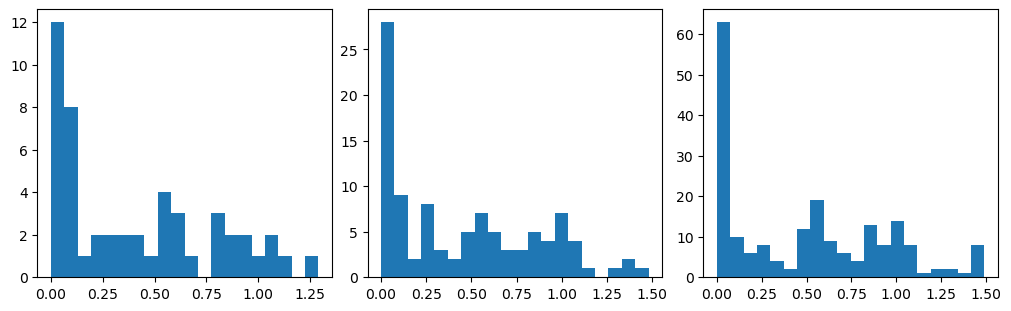

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout="constrained")
for i, sample_size in enumerate(sample_dict):
    ax[i].hist(df.loc[sample_dict[sample_size][0], 'fitness_raw'], bins=20)

In [22]:
import pickle
with open(os.path.join(data_path, 'sampled_gb1.pkl'), 'wb') as f:
    pickle.dump(sample_dict, f)

### TEM1

In [23]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/fitness_prediction/TEM1'

file = os.path.join(data_path, 'dataset_tem1.csv')
df = pd.read_csv(file)

train_mask = (df['split_id'] == 2)

In [24]:
df.head()

,pos,variant,fitness_raw,fitness_norm,wt_aa,n_mut,seq,fold_id,split_id
0,58,F58N,1.537240,1.142208,F,1,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,1,2
1,19,L19W,1.053720,1.094952,L,1,MSIQHFRVALIPFFAAFCWPVFAHPETLVKVKDAEDQLGARVGYIE...,0,2
2,15,A15Y,0.823567,1.072459,A,1,MSIQHFRVALIPFFYAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,0,2
3,182,A182M,0.768011,1.067029,A,1,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,6,0
4,281,S281F,0.768011,1.067029,S,1,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...,9,2


In [25]:
max_filter = df['fitness_norm'] < 1.5

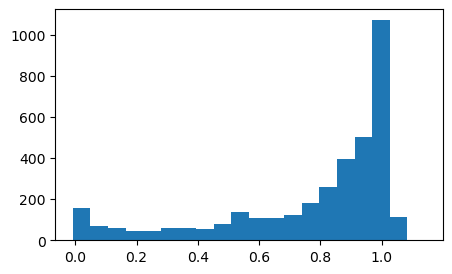

In [26]:
plt.figure(figsize=(5,3))
_ = plt.hist(df[train_mask & max_filter]['fitness_norm'], bins=20)

In [27]:
sample_dict = {}
for sample_size in [50, 100, 200]:
    sample_dict[sample_size] = {}
    for k in range(5):
        sampled = match_distribution(ref_values, df[train_mask & max_filter]['fitness_norm'].to_numpy(), np.array(df[train_mask & max_filter].index), sample_size, num_bins=20)
        sample_dict[sample_size][k] = sampled

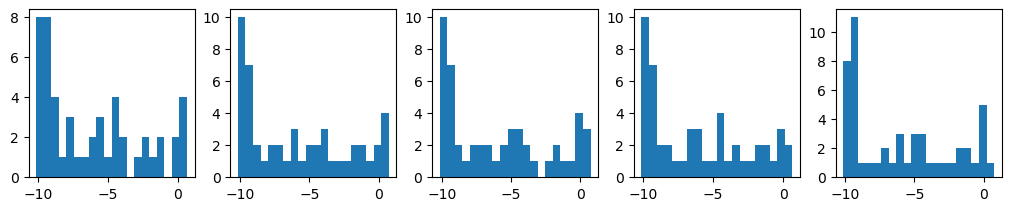

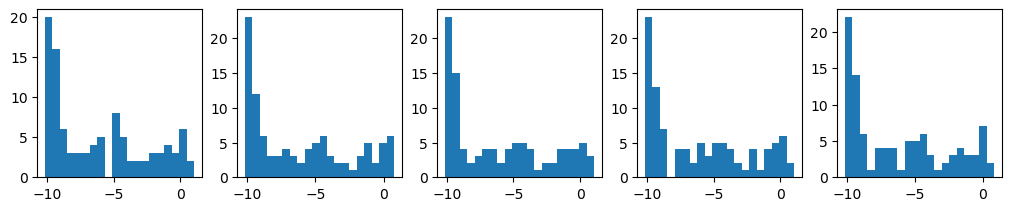

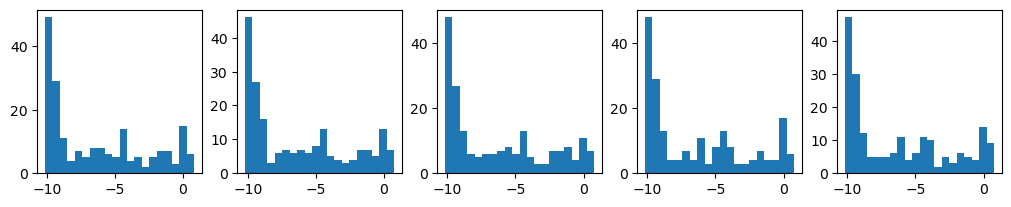

In [28]:
for sample_size in sample_dict:
    fig, ax = plt.subplots(1, 5, figsize=(10,2), layout="constrained")
    for k in sample_dict[sample_size]:
        ax[k].hist(df.loc[sample_dict[sample_size][k], 'fitness_raw'], bins=20)

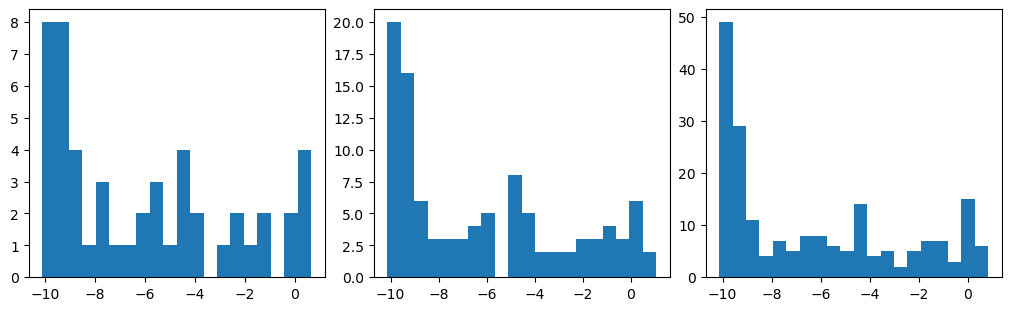

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout="constrained")
for i, sample_size in enumerate(sample_dict):
    ax[i].hist(df.loc[sample_dict[sample_size][0], 'fitness_raw'], bins=20)

In [ ]:
import pickle
with open(os.path.join(data_path, 'sampled_tem1.pkl'), 'wb') as f:
    pickle.dump(sample_dict, f)

### For plots

In [11]:
import pickle

In [15]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/fitness_prediction/GB1'

file = os.path.join(data_path, 'dataset_gb1.csv')
df = pd.read_csv(file)

file = os.path.join(data_path, 'sampled_gb1.pkl')
with open(file, 'rb') as f:
    sample_dict = pickle.load(f)

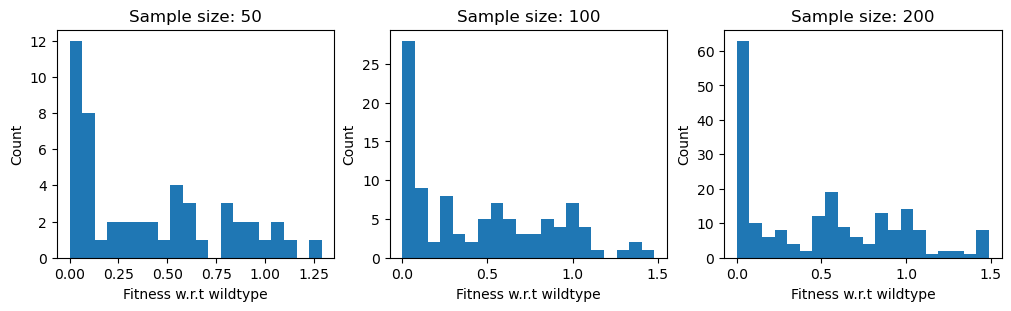

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout="constrained")
for i, sample_size in enumerate(sample_dict):
    ax[i].hist(df.loc[sample_dict[sample_size][0], 'fitness_raw'], bins=20)
    ax[i].set_title(f'Sample size: {sample_size}')
    ax[i].set_xlabel('Fitness w.r.t wildtype')
    ax[i].set_ylabel('Count')

In [19]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/fitness_prediction/TEM1'

file = os.path.join(data_path, 'dataset_tem1.csv')
df = pd.read_csv(file)

file = os.path.join(data_path, 'sampled_tem1.pkl')
with open(file, 'rb') as f:
    sample_dict = pickle.load(f)

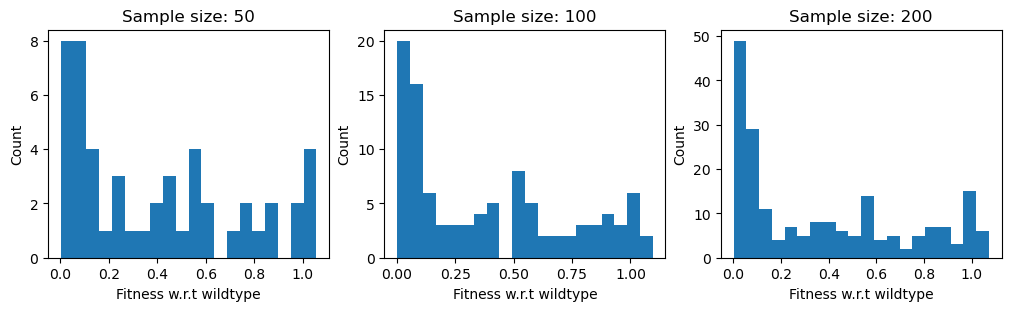

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout="constrained")
for i, sample_size in enumerate(sample_dict):
    ax[i].hist(df.loc[sample_dict[sample_size][0], 'fitness_norm'], bins=20)
    ax[i].set_title(f'Sample size: {sample_size}')
    ax[i].set_xlabel('Fitness w.r.t wildtype')
    ax[i].set_ylabel('Count')